
Online-Kurs zu Modellierung und Simulation, Goethe-Universität-Frankfurt | [Startseite](../../index.ipynb)

---


# Numerische Lösung des SIR-Modells
[vgl. Allgemeinwissen in der Wikipedia](https://de.wikipedia.org/wiki/SIR-Modell)


Betrachte Populationen von nicht-immunen Gesunden $S$ (engl: susceptible), Infizierten $I$ und Genesenen $R$ (engl. recovered). Es sei $N:=S+I+R$ die Gesamtzahl der Individueen. Modellieren nun:
\begin{align}
\dot{S} & = &-\beta*\frac{I}{N} S&  \\
\dot{I} & = &\beta*\frac{I}{N} S &- \gamma I  \\
\dot{R} & = & &  + \gamma I  \\
\end{align}
mit Infektionsrate $\beta>0$ und Genesungsrate $\gamma>0$. In diesem Modell versterben keine Individuen, also $N:=S(t)+I(t)+R(t) = const$.

In [1]:
global N = 1000;
global beta = 0.5 # Kontaktreduktion: 0.12, 0.012
global gamma = 0.04

Die (individuelle) Infektionsrate ist
$$\lambda= \beta\frac{I}{N}$$

Die Basisreproduktionszahl ist $r_0:=\frac{\beta}{\gamma}$:

In [2]:
r0 = beta/gamma

r0 = 12.500


Zunächst wollen wir die rechte Seite der Differentialgleichung definieren:

In [3]:
function udot=rhs_SIR(u, t)
   
    global N
    global beta
    global gamma
    
    S = u(1);
    I = u(2);
    R = u(3); 
    
    udot = zeros(3,1);   
    
    udot(1) = -beta/N*S*I;
    udot(2) =  beta/N*S*I - gamma *I;
    udot(3) =               gamma *I;
endfunction

## Lösen der DGL
Ein Anfangswert $u_0:=(S_0, I_0, R_0)^T$ sei gegeben.

In [4]:
u0 = [N-3, 3, 0]

u0 =

   997     3     0



Definiere mittels `linspace` einen Vektor "times" mit 500 äquidistant verteilten Punkten im Intervall [0,100]. 

In [5]:
times = linspace(0.0, 100.0, 500);

Lösen der DGL mit `lsode`.

In [6]:
numsol  = lsode (@(y,t) rhs_SIR(y,t), u0, times);

## Erzeuge Plots

r0 = 12.500


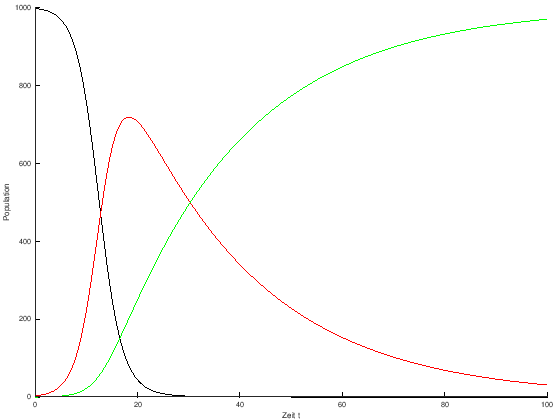

In [7]:
hold on   % 
xlabel('Zeit t')
ylabel('Population')
plot(times, numsol(:,1), 'color', 'black')
plot(times, numsol(:,2), 'color', 'red')
plot(times, numsol(:,3), 'color', 'green')
r0